# Buisness Case:- Blood Donation

- Introduction
Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. The demand for blood fluctuates throughout the year. As one prominent example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.

##### Aim Of Project:

To build a model which can identify who is likely to donate blood again using TPOT. TPOT can eliminate the most tedious part of machine learning seemlessly and effortlessly more than ever.

You can reach TPOT website and documentation from TPOT.

Let's get started exploring the data

Blood transfusion saves lives - from replacing lost blood during major surgery or a
serious injury to treating various illnesses and blood disorders. Ensuring that there&#39;s
enough blood in supply whenever needed is a serious challenge for the health
professionals. According to WebMD,&quot;about 5 million Americans need a blood
transfusion every year&quot;. Our dataset is from a mobile blood donation vehicle in Taiwan.
The Blood Transfusion Service Center drives to different universities and collects blood
as part of a blood drive. We want to predict whether or not a donor will give blood the
next time the vehicle comes to campus in March 2007

### Problem
One of the major problem while organising the Blood Donation Camp was that to convince the people who were walking near the camp to be a donor which results in 70% of the people were not interesting in donating due to reasons like they have work to do, they need to go somewhere etc.

I found the data that I needed from https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1011-BloodDonaPred.zip

### Use information about each donor's history
- Months since Last Donation: this is the number of monthis since this donor's most recent donation.
- Number of Donations: this is the total number of donations that the donor has made.
- Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
- Months since First Donation: this is the number of months since the donor's first donation.

## Importing Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filter the unwanted warings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable

In [3]:
# Here, We are loading the dataset by using the pandas

df=pd.read_csv(r"C:\Users\nithi\Desktop\Datamites project\Blood Donation Prediction\PRCP-1011-BloodDonaPred\Data\Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")

## DOMAIN ANALYSIS

<ol>
<li> There is one unnamed column with the meaning so we can delete the column 
<li> Months since Last Donation column referes that the donation  made at the last month
<li> Number of donation column indicates that the total number fo donation is done
<li> Total volume Donated(c.c) it give the total volume of donation made at the month
<li> Month since first donation it showes the donation made at the last month
<li> And the last column showes the donation made in the march 2007

In [4]:
# Displaying the first 4 rows of the dataset using the 'head()' function where 4 is given as a parameter

df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
# Displaying the last 4 rows of the dataset using the 'tail()' function where 4 is given as a parameter

df.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [6]:
# Printing all the column from the dataframe

df.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [7]:
# Printing the number of rows and columns using thr "shape()" function

df.shape

(576, 6)

- Shape of the dataset is 576 rows and 6 columns

In [8]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [9]:
# Checking for the null values

df.isnull().sum()  

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

- There is no null values presented in this dataset

In [10]:
# Checking for the duplicated values

df[df.duplicated()]

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007


In [11]:
# Status of the dataset

df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


 - The highest numberof donation is 576.000000 and the lowest is 50.000000
 - The mean of the number of donation is 5.427083

# Exploratory data analysis

In [12]:
#  It will count the number of records for every combination of unique values 

df['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [13]:
# Checking the feature 

df['Unnamed: 0']

0      619
1      664
2      441
3      160
4      358
      ... 
571    698
572    433
573    360
574    541
575     74
Name: Unnamed: 0, Length: 576, dtype: int64

- There is one unnamed column in this dataset
- This is the unwanted columns without the meaning

In [14]:
# Removing the unwanted columns

df.drop(['Unnamed: 0'],axis=1,inplace=True) 

- The unnamed column has been removed

In [15]:
# recheck the data the unnamed column is droped or not

df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


- The unnamed column has succesfully droped

# Univariate Analysis

In [16]:
# it set the baground into darkgrid

sns.set_style("darkgrid")

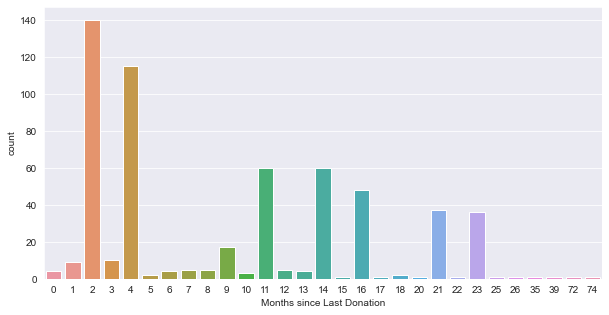

In [17]:
# Setting up the figure size
plt.figure(figsize=(10,5)) 

# Setting value for the bar graph
sns.countplot(x='Months since Last Donation',data=df,)

plt.show()

-  In the graph it shows the number of donation made at the time period

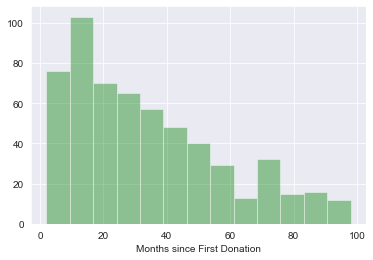

In [18]:
# By using the distplot seeing the distribution of month since first donation

sns.distplot(df['Months since First Donation'],color='green',kde=False)
plt.show()

- The graph shows the highest number of donation is done at the starting and it gradually decreased

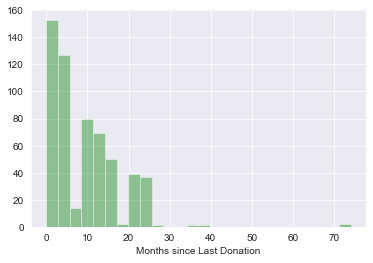

In [19]:
# By using the distplot seeing the distribution of month since last donation

sns.distplot(df['Months since Last Donation'],color='green',kde=False)
plt.show()

- The graph shows the highest number of donation is done at the starting and it gradually decreased

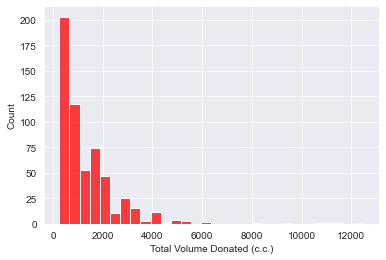

In [20]:
# By using the histplot we are checking the distribution of total volume of donated

sns.histplot(df['Total Volume Donated (c.c.)'],bins=30,color='red')
plt.show()

- At the starting the Total volume of Donated reaches the 200 

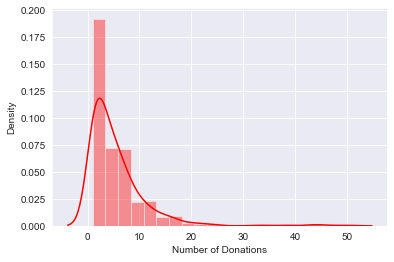

In [21]:
# By using the histplot we are checking the distribution of total volume of donated

sns.distplot(df['Number of Donations'],bins=20,color='red')
plt.show()

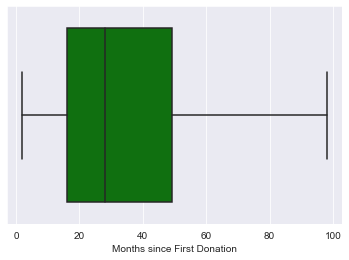

In [22]:
# checking for outliers

sns.boxplot(x=df['Months since First Donation'],color='green')
plt.show()

-  There is no outlier in the month since last donation

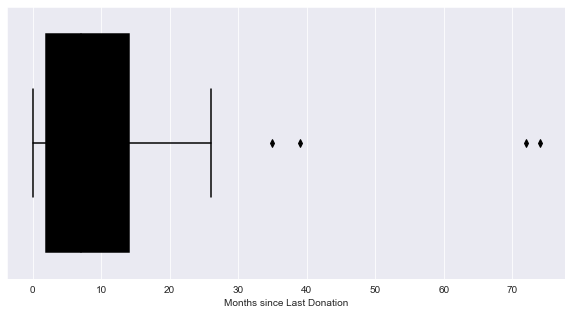

In [23]:
# checking for outliers
# Setting up the figure size
plt.figure(figsize=(10,5)) 

sns.boxplot(x=df['Months since Last Donation'],color='black')
plt.show()

- There are four Outlires  presented in this columns

In [24]:
# Checking for the outliers where the value is greater than 60 

df.loc[df["Months since Last Donation"]>=60]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
385,74,1,250,74,0
575,72,1,250,72,0


- There are 2 outliers presented in the Months since Last Donation column

In [25]:
# droping the outliers

df.drop(df.loc[df["Months since Last Donation"]>=60].index,inplace=True)

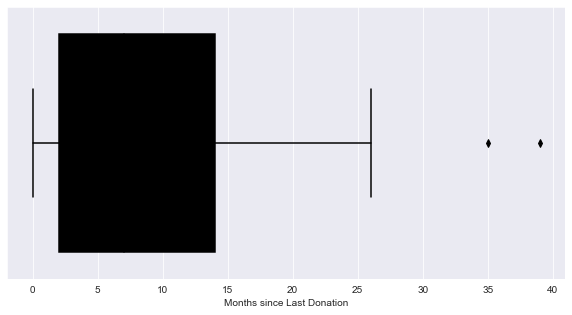

In [26]:
# Rechecking for the outliers 

# Setting up the figure size
plt.figure(figsize=(10,5)) 
sns.boxplot(x=df['Months since Last Donation'],color='black')

plt.show()

- The outliers where more than 60 has succesfully droped

# Bivariant Analysis

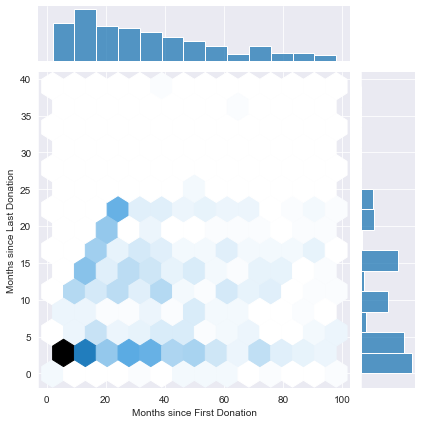

In [27]:
# comparision the Months since First Donation and Months since Last Donation by using the jointplot
sns.jointplot(x='Months since First Donation',y='Months since Last Donation',data=df,kind='hex')
plt.show()

- This graph shows the darker part show the data which has the highest number of count

<Figure size 864x576 with 0 Axes>

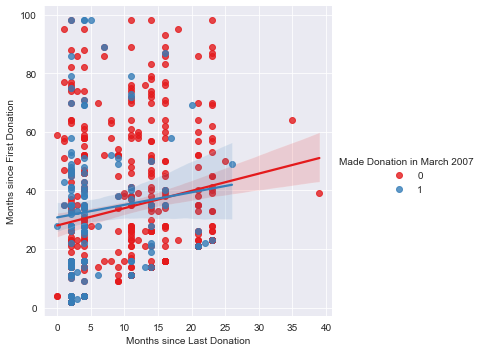

In [28]:
# By using the lmplot comparing the features

# Setting up the figure size
plt.figure(figsize=(12,8))

# Setting value for the bar graph
sns.lmplot(y='Months since First Donation',x='Months since Last Donation',data=df
           ,hue='Made Donation in March 2007',palette='Set1')
plt.show()

- This graph shows the variation of the datapoints in both the column

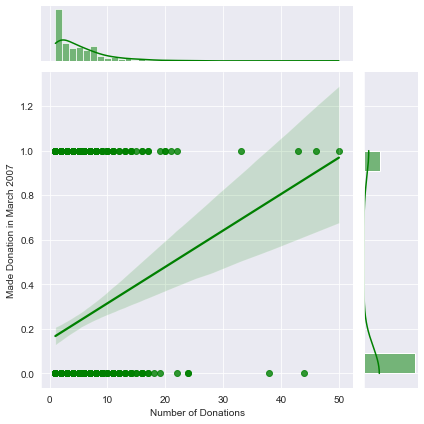

In [29]:
# By using the joinplot comparing the number of donation and made donation in march 2007

sns.jointplot(x='Number of Donations',y='Made Donation in March 2007',data=df,kind='reg',color='green')
plt.show()

- This graph shows the Number of donation and the made donation in march 2007 

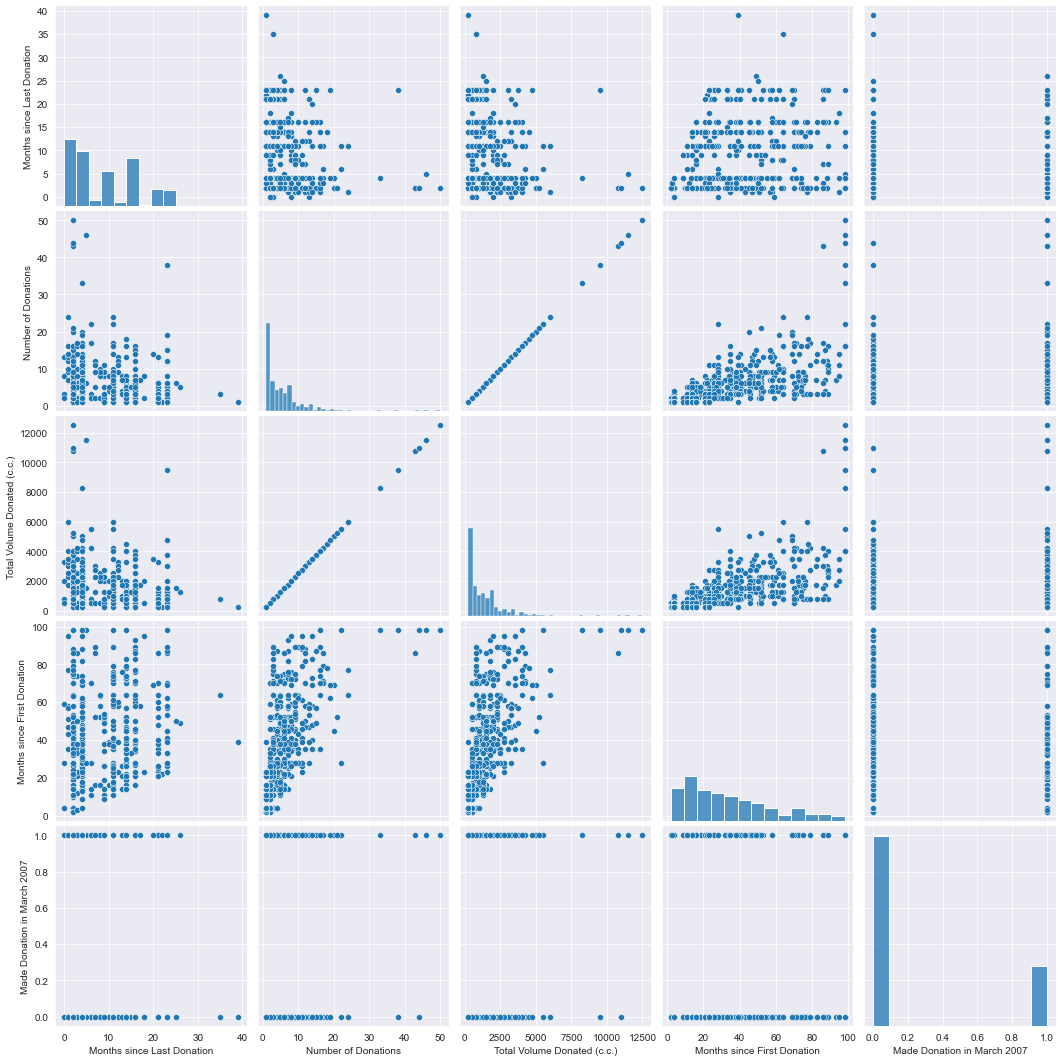

In [30]:
# By using the  pair plot comparing all the features

sns.pairplot(df,height=3,palette='coolwarm')
plt.show()

- This graph shows the comparision of the features

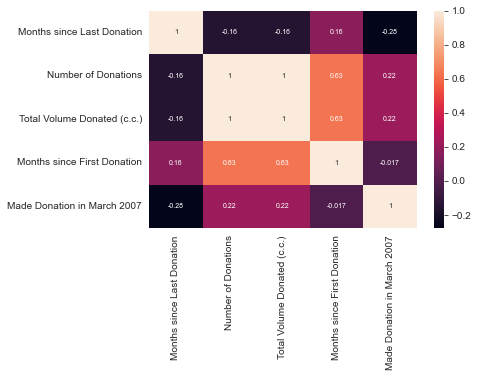

In [31]:
# by using the HeatMap cheching the correlation between all the features

sns.heatmap(df.corr(),annot_kws={"size":7},linecolor='white',annot=True)
plt.show()

 - It gives the co-relation between the datapoint 
 - In the graph the number of donation and the Total volume of the donation datapoin are same 
 - so we going to delete any one of the column

<Figure size 2160x2160 with 0 Axes>

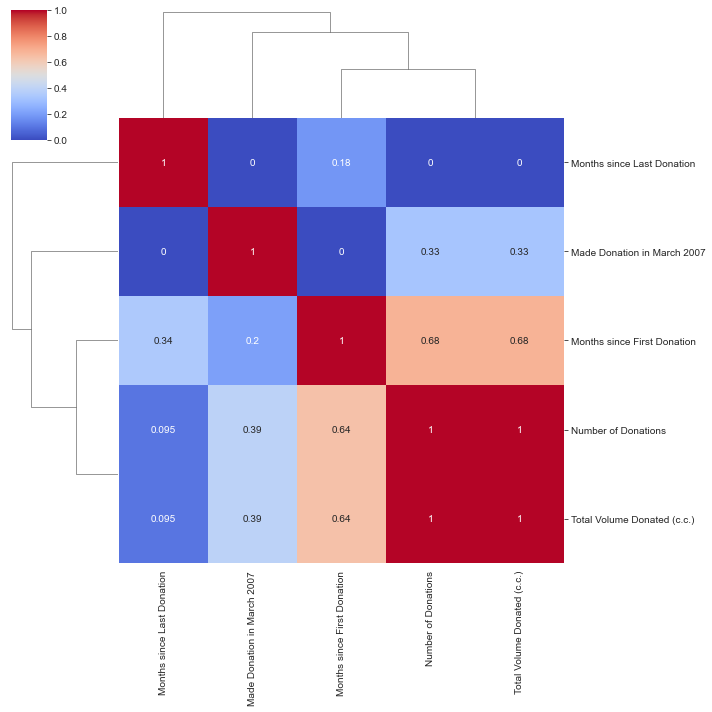

In [32]:
# Using the Cluster map

plt.figure(figsize=(30, 30))    #canvas size

sns.clustermap(df.corr(),cmap='coolwarm',standard_scale=1,annot=True)
plt.show()

-  In this cluster map it shows the month since last donation and total volume donated(c.c)

# Train & Test Split

In [33]:
#Spliting dataset into test & train data to train model

X=df.drop(['Made Donation in March 2007'],axis=1) # independent columns X
y=df['Made Donation in March 2007']               # dependent column y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

# Model Training and Evaluation

# 1. Logistic Regression

In [34]:
# loading the logistic regression model

model=LogisticRegression() 

In [35]:
# fitting the data in the model

model.fit(X_train,y_train)

LogisticRegression()

In [36]:
#pred the model with train and test data
logmodel_pred=model.predict(X_test)
logmodel_pred_train = model.predict(X_train)

In [37]:
logmodel_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
 # confusion matrix of the test data
    
print(confusion_matrix(logmodel_pred,y_test))

[[140  37]
 [  4   9]]


In [39]:
# classification report of the training dataset

pd.DataFrame(classification_report(y_train,logmodel_pred_train,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.775956,0.555556,0.765625,0.665756,0.723152
recall,0.972603,0.108696,0.765625,0.540649,0.765625
f1-score,0.863222,0.181818,0.765625,0.522520,0.699969
support,292.000000,92.000000,0.765625,384.000000,384.000000


In [40]:
# classification report of the test dataset

pd.DataFrame(classification_report(y_test,logmodel_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.790960,0.692308,0.784211,0.741634,0.767076
recall,0.972222,0.195652,0.784211,0.583937,0.784211
f1-score,0.872274,0.305085,0.784211,0.588679,0.734955
support,144.000000,46.000000,0.784211,190.000000,190.000000


In [41]:
# roc and accuracy score of the model with traing data

roc_auc_score(logmodel_pred_train,y_train)

0.6657559198542805

In [42]:
# roc and accuracy score of the model with the test data

roc_auc_score(logmodel_pred,y_test)

0.7416340721425467

In [43]:
# The accuracy of the model with traing data

accuracy_score(logmodel_pred_train,y_train)

0.765625

In [44]:
# The accuracy of the model with test data

accuracy_score(logmodel_pred,y_test)

0.7842105263157895

#####   ✔️ With test data, we achieved an accuracy of 78%, and with training data, we achieved an accuracy of 76% in Logistic Regression

# 2 .K-Nearest Neighbor

### Using The Elbow Method 

In [45]:
# Iterating n_neighbors from 1 to 40 to get best value of K

error_rate = []


for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    KNN.fit(X_train, y_train)  
    X_pred = KNN.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,X_pred)) 
    error_rate.append(error) 

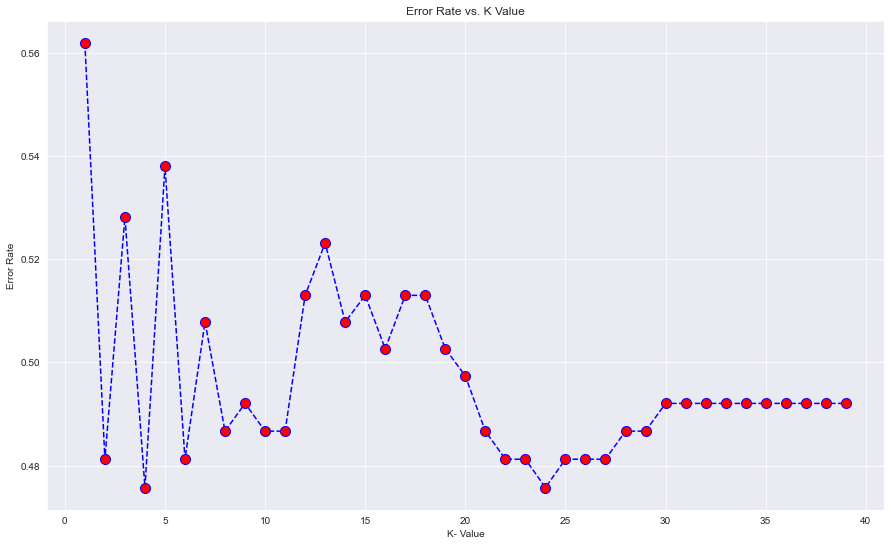

In [46]:
#Plotting the error rate So,that we can choose the value of K using Elbow Method

plt.figure(figsize=(15,9))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K- Value')
plt.ylabel('Error Rate')
None

- This graph gives the error rate of the data

In [47]:
# Using the Grid Search CV Method

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

model = KNeighborsClassifier()

model = GridSearchCV(model, params, cv=10)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [48]:
#load the model

model=KNeighborsClassifier(n_neighbors=2,n_jobs=-1)

In [49]:
# fitting the model

model.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [50]:
# preding the model with test data

knn_pred=model.predict(X_test)

In [51]:
knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [52]:
# preding the model with train data

knn_pred_train=model.predict(X_train)

In [53]:
knn_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [54]:
# confusion matrix of the test data

print(confusion_matrix(y_test,knn_pred))

[[136   8]
 [ 36  10]]


In [55]:
# classification report of train data 

pd.DataFrame(classification_report(y_train,knn_pred_train,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.840580,0.948718,0.851562,0.894649,0.866488
recall,0.993151,0.402174,0.851562,0.697662,0.851562
f1-score,0.910518,0.564885,0.851562,0.737702,0.827710
support,292.000000,92.000000,0.851562,384.000000,384.000000


In [56]:
# classification report of test data 

pd.DataFrame(classification_report(y_test,knn_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.790698,0.555556,0.768421,0.673127,0.733769
recall,0.944444,0.217391,0.768421,0.580918,0.768421
f1-score,0.860759,0.312500,0.768421,0.586630,0.728023
support,144.000000,46.000000,0.768421,190.000000,190.000000


In [57]:
# roc and accuracy score of the model with traing data

roc_auc_score(knn_pred_train,y_train)

0.8946488294314381

In [58]:
# roc and accuracy score of the model

roc_auc_score(knn_pred,y_test)

0.67312661498708

In [59]:
accuracy_score(knn_pred_train,y_train)

# The accuracy of the model with traing data

0.8515625

In [60]:
accuracy_score(knn_pred,y_test)

# The accuracy of the model with test data

0.7684210526315789

##### ✔️ With test data, we achieved an accuracy of 76%, and with training data, we achieved an accuracy of  85%  in K Nearest Neighbor

   # 3.Support Vector Machine - Classifier


In [61]:
# loading the model

model=SVC()

In [62]:
# fitting the data with the model

model.fit(X_train,y_train)

SVC()

In [63]:
svc_pred_train=model.predict(X_train)

#predicting the model with train data

In [64]:
svc_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
svc_pred=model.predict(X_test)

#predicting the model with test data

In [66]:
svc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
# confusion matrix of the model

print(confusion_matrix(y_test,svc_pred))

[[144   0]
 [ 46   0]]


In [68]:
# classification report of the model with train data

pd.DataFrame(classification_report(y_train,svc_pred_train,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.760417,0.0,0.760417,0.380208,0.578234
recall,1.000000,0.0,0.760417,0.500000,0.760417
f1-score,0.863905,0.0,0.760417,0.431953,0.656928
support,292.000000,92.0,0.760417,384.000000,384.000000


In [69]:
# classification report of the model

pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.757895,0.0,0.757895,0.378947,0.574404
recall,1.000000,0.0,0.757895,0.500000,0.757895
f1-score,0.862275,0.0,0.757895,0.431138,0.653514
support,144.000000,46.0,0.757895,190.000000,190.000000


In [70]:
accuracy_score(svc_pred_train,y_train)

#Checking for the accuracy of train data

0.7604166666666666

In [71]:
accuracy_score(svc_pred,y_test)

#Checking for the accuracy of test data

0.7578947368421053

 ##### ✔️ With test data, we achieved an accuracy of 75%, and with training data, we achieved an accuracy of  76%  in Support Vector Machine - Classifier

In [72]:
parameter={
      "C":[0,1,2,3,4,5,6,7,8,9,10],#C=regularization parameter,
  'gamma':[1,0.1,0.01,0.001,0.0001]
}

In [73]:
svc=SVC(kernel='rbf')
cv=GridSearchCV(svc,parameter,verbose=3,)

In [74]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV 1/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 2/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 3/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 4/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 5/5] END ........................C=0, gamma=1;, score=nan total time=   0.0s
[CV 1/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 2/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 3/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 4/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 5/5] END ......................C=0, gamma=0.1;, score=nan total time=   0.0s
[CV 1/5] END .....................C=0, gamma=0.01;, score=nan total time=   0.0s
[CV 2/5] END .....................C=0, gamma=0.

[CV 1/5] END ...................C=4, gamma=0.01;, score=0.779 total time=   0.0s
[CV 2/5] END ...................C=4, gamma=0.01;, score=0.714 total time=   0.0s
[CV 3/5] END ...................C=4, gamma=0.01;, score=0.727 total time=   0.0s
[CV 4/5] END ...................C=4, gamma=0.01;, score=0.753 total time=   0.0s
[CV 5/5] END ...................C=4, gamma=0.01;, score=0.789 total time=   0.0s
[CV 1/5] END ..................C=4, gamma=0.001;, score=0.779 total time=   0.0s
[CV 2/5] END ..................C=4, gamma=0.001;, score=0.714 total time=   0.0s
[CV 3/5] END ..................C=4, gamma=0.001;, score=0.779 total time=   0.0s
[CV 4/5] END ..................C=4, gamma=0.001;, score=0.766 total time=   0.0s
[CV 5/5] END ..................C=4, gamma=0.001;, score=0.763 total time=   0.0s
[CV 1/5] END .................C=4, gamma=0.0001;, score=0.766 total time=   0.0s
[CV 2/5] END .................C=4, gamma=0.0001;, score=0.688 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ...................C=8, gamma=0.01;, score=0.776 total time=   0.0s
[CV 1/5] END ..................C=8, gamma=0.001;, score=0.792 total time=   0.0s
[CV 2/5] END ..................C=8, gamma=0.001;, score=0.727 total time=   0.0s
[CV 3/5] END ..................C=8, gamma=0.001;, score=0.779 total time=   0.0s
[CV 4/5] END ..................C=8, gamma=0.001;, score=0.766 total time=   0.0s
[CV 5/5] END ..................C=8, gamma=0.001;, score=0.776 total time=   0.0s
[CV 1/5] END .................C=8, gamma=0.0001;, score=0.753 total time=   0.0s
[CV 2/5] END .................C=8, gamma=0.0001;, score=0.688 total time=   0.0s
[CV 3/5] END .................C=8, gamma=0.0001;, score=0.753 total time=   0.0s
[CV 4/5] END .................C=8, gamma=0.0001;, score=0.688 total time=   0.0s
[CV 5/5] END .................C=8, gamma=0.0001;, score=0.737 total time=   0.0s
[CV 1/5] END ......................C=9, gamma=1;, score=0.779 total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [75]:
#To view the best paramter obtained by Hyperparameter Tunning

cv.best_params_

{'C': 6, 'gamma': 0.001}

In [76]:
svc1 = SVC(kernel="rbf",C=1,gamma=0.1)
svc1.fit(X_train,y_train)

SVC(C=1, gamma=0.1)

-  We get the best parameter,C as 10 and epsilon as 8


In [77]:
#Prediction for test and train models

svc1_pred_train = svc1.predict(X_train)
svc1_pred = svc1.predict(X_test)

In [78]:
# confusion matrix of the model

print(confusion_matrix(y_test,svc1_pred))

[[135   9]
 [ 40   6]]


In [79]:
# classification report  of the model of train data

pd.DataFrame(classification_report(y_train,svc1_pred_train,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.897833,0.967213,0.908854,0.932523,0.914455
recall,0.993151,0.641304,0.908854,0.817228,0.908854
f1-score,0.943089,0.771242,0.908854,0.857166,0.901918
support,292.000000,92.000000,0.908854,384.000000,384.000000


In [80]:
# classification report  of the model of test data

pd.DataFrame(classification_report(y_test,svc1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.771429,0.400000,0.742105,0.585714,0.681504
recall,0.937500,0.130435,0.742105,0.533967,0.742105
f1-score,0.846395,0.196721,0.742105,0.521558,0.689106
support,144.000000,46.000000,0.742105,190.000000,190.000000


In [81]:
# roc and accuracy score of the model with train data

roc_auc_score(y_train,svc1_pred_train)

0.8172275163787969

In [82]:
# roc and accuracy score of the model with test data

roc_auc_score(y_test,svc1_pred)

0.5339673913043478

In [83]:
# The accuracy of the model with train data

accuracy_score(y_train,svc1_pred_train)

0.9088541666666666

In [84]:
# The accuracy of the model with test data

accuracy_score(y_test,svc1_pred)

0.7421052631578947

##### ✔️ With test data, we achieved an accuracy of 74%, and with training data, we achieved an accuracy of 90%Support Vector Machine - Classifier  after tunning

#  4 .Decision Tree Algorithm

In [85]:
# load the model

model=tree.DecisionTreeClassifier()

In [86]:
# fit the model

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
# preding the model with the train data

DT_pred_train=model.predict(X_train)

In [88]:
DT_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [89]:
# preding the model with the test data

DT_pred=model.predict(X_test)

In [90]:
DT_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [91]:
# The confution matrix of the model

print(confusion_matrix(y_test,DT_pred))

[[117  27]
 [ 31  15]]


In [92]:
# The classification of the model with train data

pd.DataFrame(classification_report(y_train,DT_pred_train,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.944625,0.974026,0.950521,0.959326,0.951669
recall,0.993151,0.815217,0.950521,0.904184,0.950521
f1-score,0.968280,0.887574,0.950521,0.927927,0.948945
support,292.000000,92.000000,0.950521,384.000000,384.000000


In [93]:
# The classification of the model

pd.DataFrame(classification_report(y_test,DT_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.790541,0.357143,0.694737,0.573842,0.685613
recall,0.812500,0.326087,0.694737,0.569293,0.694737
f1-score,0.801370,0.340909,0.694737,0.571139,0.689890
support,144.000000,46.000000,0.694737,190.000000,190.000000


In [94]:
# The accuracy of the model with train data

accuracy_score(y_train,DT_pred_train)

0.9505208333333334

In [95]:
# The accuracy of the model

accuracy_score(y_test,DT_pred)

0.6947368421052632

##### ✔️  With test data, we achieved an accuracy of 68%, and with training data, we achieved an accuracy of 95% in Decision Tree Algorithm

# 5 .RandomForestClassifier

In [96]:
# Load the model

modle=RandomForestClassifier()

In [97]:
# fit the model with the data

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
# Predicting the model with the train data

rfc_pred_train=model.predict(X_train)

In [99]:
rfc_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [100]:
# Predicting the model with the test data

rfc_pred=model.predict(X_test)

In [101]:
rfc_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [102]:
# confusion matrix of the model

print(confusion_matrix(y_test,rfc_pred))

[[115  29]
 [ 30  16]]


In [103]:
# The classification report of the model with train data

pd.DataFrame(classification_report(y_train,rfc_pred_train,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.944625,0.974026,0.950521,0.959326,0.951669
recall,0.993151,0.815217,0.950521,0.904184,0.950521
f1-score,0.968280,0.887574,0.950521,0.927927,0.948945
support,292.000000,92.000000,0.950521,384.000000,384.000000


In [104]:
# The classification report of the model

pd.DataFrame(classification_report(y_test,rfc_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.793103,0.355556,0.689474,0.574330,0.687171
recall,0.798611,0.347826,0.689474,0.573219,0.689474
f1-score,0.795848,0.351648,0.689474,0.573748,0.688305
support,144.000000,46.000000,0.689474,190.000000,190.000000


In [105]:
# The accuracy score of the model with train data

accuracy_score(y_train,rfc_pred_train)

0.9505208333333334

In [106]:
# The accuracy score of the model with test data

accuracy_score(y_test,rfc_pred)

0.6894736842105263

##### ✔️   With test data, we achieved an accuracy of 68%, and with training data, we achieved an accuracy of 95% in RandomForestClassifier

# Conclusion

In [107]:
x=PrettyTable()

In [108]:
# Creating the table to compare the model accuracy

x.field_names = ["Model","(test)Accuracy", "(train)Accuracy"]
x.add_row(["Logistic Regression",'78 %','76%'])
x.add_row(["K-Nearest Neighbor", '76 %','85 %'])
x.add_row(["Support Vector Classifier",'75 %','76 %'])
x.add_row(["Support Vector Classifier using GridsearchCV",'74 %','90 %'])
x.add_row(["Decision Trees Classifier",' 68 %','95 %'])
x.add_row(["Random Forest", '68 %','95 %'])

In [109]:
# The accuracy of the every model
print(x)

+----------------------------------------------+----------------+-----------------+
|                    Model                     | (test)Accuracy | (train)Accuracy |
+----------------------------------------------+----------------+-----------------+
|             Logistic Regression              |      78 %      |       76%       |
|              K-Nearest Neighbor              |      76 %      |       85 %      |
|          Support Vector Classifier           |      75 %      |       76 %      |
| Support Vector Classifier using GridsearchCV |      74 %      |       90 %      |
|          Decision Trees Classifier           |      68 %      |       95 %      |
|                Random Forest                 |      68 %      |       95 %      |
+----------------------------------------------+----------------+-----------------+


####  Based on the observations above, we can conclude that Logistic Regression is the best-fitting model with the  test data, we achieved an accuracy of 78%, and with training data, we achieved an accuracy of 95% accuracy for the given problem

# Conclusion

Now we can target the people who are interested in donating blood and which will results in getting more volunteers and we can save more people.

The demand for blood fluctuates throughout the year. As one prominent example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.

In this notebook, we explored automatic model selection using TPOT and AUC score we got was 0.7850. This is better than simply choosing 0 all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score by 0.5%. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.

Another benefit of using logistic regression model is that it is interpretable. We can analyze how much of the variance in the response variable (target) can be explained by other variables in our dataset.